###Creating the dataset. We have a circular dataset for classification and we want to use a neural network to learn the decision boundaries.



In [ ]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

def make_circle_data(n=500, radius=0.5):
    X = np.random.rand(n, 2) * 2 - 1
    y = (np.linalg.norm(X, axis=1) < radius).astype(np.float32)
    return jnp.array(X), jnp.array(y).reshape(-1, 1)

X, y = make_circle_data()


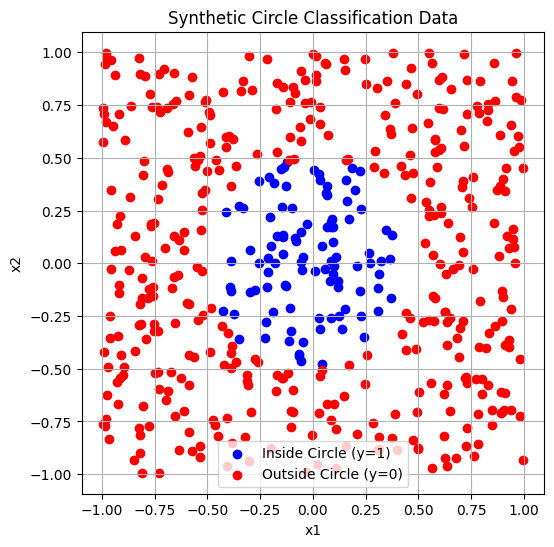

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y[:, 0] == 1][:, 0], X[y[:, 0] == 1][:, 1], color='blue', label='Inside Circle (y=1)')
plt.scatter(X[y[:, 0] == 0][:, 0], X[y[:, 0] == 0][:, 1], color='red', label='Outside Circle (y=0)')
plt.gca().set_aspect('equal')
plt.title("Synthetic Circle Classification Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


### Q1: initialize the parameters to be random variables based on what you learned in the mini tutorial. initialize k1 and k2 as your random keys.  use k1 for W1 and k2 for W2. fill the part that says TODO and upload your response in crowdmark.

In [ ]:
import jax
from jax import grad
from jax.nn import relu, sigmoid
import optax  # for optimization

def init_params(key, hidden_dim=8):
    k1, k2 = #TODO: fill here  random keys k1 and k2 . use k1 for W1 and k2 for W2
    W1 = #TODO: fill here
    b1 = jnp.zeros((1, hidden_dim))
    W2 = #TODO: fill here
    b2 = jnp.zeros((1,))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}


### Q2: define  the forward step for the neural network based on the parameters of the network.

In [ ]:
def forward(params, x):
    z1 = # todo: fill here
    a1 = relu(z1)
    z2 = # todo: fill here
    return sigmoid(z2)


### Q3 : define the loss function as the binary cross entropy loss.

In [ ]:
def loss(params, x, y):
    y_pred = forward(params, x)
    return # todo  fill here


### Q4: fill the update function to calculate gradients on each step.

In [ ]:
# Generate random key
key = jax.random.PRNGKey(0)

# Create initial parameters
params = init_params(key)

opt = optax.sgd(learning_rate=0.1)
opt_state = opt.init(params)
@jax.jit
def update(params, opt_state, x, y):
    grads = # todo: fill here
    updates, opt_state = opt.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state


In [ ]:
losses = []
for epoch in range(10000):
    params, opt_state = update(params, opt_state, X, y)
    l = loss(params, X, y)
    losses.append(l)


In [ ]:
plt.plot(losses)
plt.title("Loss over training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


### Q5: Plot the decision boundaries for the network.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid over your input space
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = # todo: fill here
grid_pred = np.array(grid_pred).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, grid_pred, levels=[0, 0.5, 1], alpha=0.6, cmap='RdBu')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='RdBu')
plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
